In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.DataFrame()
files = os.listdir("./patients_new")
for file in files:
    patient = pd.read_json(os.path.join("./patients_new/", file))
    df = pd.concat([df, patient], ignore_index=True)

In [ ]:
df = df.sort_values(by=["admittime"]).reset_index(drop=True)
df['admittime'] = df['admittime'].apply(lambda x: pd.to_datetime(x).replace(year=2024))
df['dischtime'] = df['dischtime'].apply(lambda x: pd.to_datetime(x).replace(year=2024))
df['dischtime'] = df.apply(lambda row: pd.to_datetime(row['dischtime']).replace(year=2025) if row['dischtime'].month < row['admittime'].month else row['dischtime'], axis=1)
df["duration_of_stay"] = pd.to_datetime(df["dischtime"]) - pd.to_datetime(df["admittime"])
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hcpcsevents,labevents,microbiologyevents,pharmacy,poe,prescriptions,procedures_icd,services,transfers,icustays
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,...,[],"[{'labevent_id': 151, 'subject_id': 10000032, ...","[{'microevent_id': 15, 'subject_id': 10000032,...","[{'subject_id': 10000032, 'hadm_id': 22595853,...","[{'poe_id': '10000032-52', 'poe_seq': 52, 'sub...","[{'subject_id': 10000032, 'hadm_id': 22595853,...","[{'subject_id': 10000032, 'hadm_id': 22595853,...","[{'subject_id': 10000032, 'hadm_id': 22595853,...","[{'subject_id': 10000032, 'hadm_id': 22595853....",[]
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,...,[],"[{'labevent_id': 332, 'subject_id': 10000032, ...","[{'microevent_id': 28, 'subject_id': 10000032,...","[{'subject_id': 10000032, 'hadm_id': 22841357,...","[{'poe_id': '10000032-69', 'poe_seq': 69, 'sub...","[{'subject_id': 10000032, 'hadm_id': 22841357,...","[{'subject_id': 10000032, 'hadm_id': 22841357,...","[{'subject_id': 10000032, 'hadm_id': 22841357,...","[{'subject_id': 10000032, 'hadm_id': 22841357....",[]
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,...,[],"[{'labevent_id': 584, 'subject_id': 10000032, ...","[{'microevent_id': 36, 'subject_id': 10000032,...","[{'subject_id': 10000032, 'hadm_id': 25742920,...","[{'poe_id': '10000032-217', 'poe_seq': 217, 's...","[{'subject_id': 10000032, 'hadm_id': 25742920,...","[{'subject_id': 10000032, 'hadm_id': 25742920,...","[{'subject_id': 10000032, 'hadm_id': 25742920,...","[{'subject_id': 10000032, 'hadm_id': 25742920....",[]
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,...,[],"[{'labevent_id': 407, 'subject_id': 10000032, ...","[{'microevent_id': 32, 'subject_id': 10000032,...","[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'poe_id': '10000032-125', 'poe_seq': 125, 's...","[{'subject_id': 10000032, 'hadm_id': 29079034,...",[],"[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034....","[{'subject_id': 10000032, 'hadm_id': 29079034,..."
4,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,NaN,EW EMER.,P4645A,EMERGENCY ROOM,HOME HEALTH CARE,Other,...,[],"[{'labevent_id': 9011, 'subject_id': 10001217,...","[{'microevent_id': 402, 'subject_id': 10001217...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'poe_id': '10001217-110', 'poe_seq': 110, 's...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018....","[{'subject_id': 10001217, 'hadm_id': 24597018,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10040025,21791856,2147-06-16 22:00:00,2147-06-22 16:15:00,NaN,OBSERVATION ADMIT,P7634X,EMERGENCY ROOM,HOME HEALTH CARE,Other,...,[],"[{'labevent_id': 472612, 'subject_id': 1004002...","[{'microevent_id': 14525, 'subject_id': 100400...","[{'subject_id': 10040025, 'hadm_id': 21791856,...","[{'poe_id': '10040025-451', 'poe_seq': 451, 's...","[{'subject_id': 10040025, 'hadm_id': 21791856,...",[],"[{'subject_id': 10040025, 'hadm_id': 21791856,...","[{'subject_id': 10040025, 'hadm_id': 21791856....",[]
271,10040025,22251969,2147-08-03 02:58:00,2147-08-06 16:50:00,NaN,OBSERVATION ADMIT,P85BWS,EMERGENCY ROOM,HOME,Other,...,[],"[{'labevent_id': 472861, 'subject_id': 1004002...",[],"[{'subject_id': 10040025, 'hadm_id': 22251969,...","[{'poe_id': '10040025-594', 'poe_seq': 594, 's...","[{'subject_id': 10040025, 'hadm_id': 22251969,...",[],"[{'subject_id': 10040025, 'hadm_id': 22251969,...","[{'subject_id': 10040025, 'had

In [ ]:
def normalize_jsons(column, dropper, sorter):
    data = []
    for datum in column:
        json_df = pd.json_normalize(datum)
        data.append(json_df)
    column_df = pd.concat(data, ignore_index=True).drop_duplicates(subset=dropper).sort_values(by=sorter).reset_index(drop=True)
    return column_df

In [ ]:
patients_df = normalize_jsons(df["patients"], ["subject_id"], ["anchor_year"])
patients_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10008454,F,26,2110,2011 - 2013,
1,10001725,F,46,2110,2011 - 2013,
2,10006053,M,52,2111,2014 - 2016,2111-11-15
3,10004422,M,78,2111,2011 - 2013,
4,10035631,M,63,2112,2011 - 2013,2116-03-12
...,...,...,...,...,...,...
95,10020786,F,86,2189,2014 - 2016,
96,10002930,F,48,2193,2011 - 2013,2201-12-24
97,10004235,M,47,2196,2014 - 2016,
98,10026255,M,66,2200,2011 - 2013,2201-07-13


In [ ]:
omr_df = normalize_jsons(df["omr"], ['subject_id', 'chartdate', 'result_name', 'result_value'], ["subject_id", "result_name", "chartdate"])
omr_df.drop([673], inplace=True)
omr_df

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,2180-05-07,1,BMI (kg/m2),18.0
1,10000032,2180-05-25,1,BMI (kg/m2),18.6
2,10000032,2180-06-01,1,BMI (kg/m2),18.7
3,10000032,2180-06-22,1,BMI (kg/m2),18.9
4,10000032,2180-06-27,1,BMI (kg/m2),19.2
...,...,...,...,...,...
2834,10040025,2147-11-09,1,Weight (Lbs),188.00
2835,10040025,2147-12-05,1,Weight (Lbs),200.00
2836,10040025,2147-12-29,1,Weight (Lbs),212
2837,10040025,2147-12-30,1,Weight (Lbs),187.61


In [ ]:
emar_df = normalize_jsons(df["emar"], ["subject_id", "hadm_id", "emar_id"], ["subject_id", "charttime"])
emar_df["time"] = (emar_df["charttime"].apply(lambda x: pd.to_datetime(x)) - emar_df["scheduletime"].apply(lambda x: pd.to_datetime(x))).apply(lambda x: x.value / 10**9)
emar_df

,subject_id,hadm_id,emar_id,emar_seq,poe_id,pharmacy_id,enter_provider_id,charttime,medication,event_txt,scheduletime,storetime,0,time
0,10000032,22595853.0,10000032-11,11,10000032-22,14779570.0,,2180-05-07 00:44:00,Sodium Chloride 0.9% Flush,Flushed,2180-05-07 00:44:00,2180-05-07 00:44:00,"[{'subject_id': 10000032, 'emar_id': '10000032...",0.000000e+00
1,10000032,22595853.0,10000032-10,10,10000032-36,48770010.0,,2180-05-07 00:44:00,Potassium Chloride,Administered,2180-05-07 00:44:00,2180-05-07 00:44:00,"[{'subject_id': 10000032, 'emar_id': '10000032...",0.000000e+00
2,10000032,22595853.0,10000032-13,13,10000032-28,42497745.0,,2180-05-07 05:00:00,Albuterol Inhaler,Administered,2180-05-07 06:29:00,2180-05-07 06:29:00,"[{'subject_id': 10000032, 'emar_id': '10000032...",-5.340000e+03
3,10000032,22595853.0,10000032-12,12,10000032-37,93463122.0,,2180-05-07 06:10:00,Ipratropium Bromide Neb,Administered,2180-05-07 06:00:00,2180-05-07 06:10:00,"[{'subject_id': 10000032, 'emar_id': '10000032...",6.000000e+02
4,10000032,22595853.0,10000032-17,17,10000032-22,14779570.0,,2180-05-07 07:51:00,Sodium Chloride 0.9% Flush,Flushed,2180-05-07 07:51:00,2180-05-07 07:56:00,"[{'subject_id': 10000032, 'emar_id': '10000032...",0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34825,10040025,27996267.0,10040025-3072,3072,10040025-1977,57820348.0,,2148-02-04 20:00:00,OxyCODONE SR (OxyconTIN),Not Given,2148-02-04 20:00:00,2148-02-04 19:47:00,"[{'subject_id': 10040025, 'emar_id': '10040025...",0.000000e+00
34826,10040025,27996267.0,10040025-3066,3066,10040025-1978,,,2148-02-04 20:00:00,Senna,Not Given,2148-02-04 20:00:00,2148-02-04 19:42:00,"[{'subject_id': 10040025, 'emar_id': '10040025...",0.000000e+00
34827,10040025,27996267.0,10040025-3065,3065,10040025-1997,,,2148-02-04 20:00:00,Polyethylene Glycol,Not Given,2148-02-04 20:00:00,2148-02-04 19:41:00,"[{'subject_id': 10040025, 'emar_id': '10040025...",0.000000e+00
34828,10040025,27996267.0,10040025-3076,3076,10040025-1999,,,2148-02-04 22:00:00,,Not Confirmed,2148-02-04 22:00:00,2148-02-04 19:52:00,"[{'subject_id': 10040025, 'emar_id': '10040025...",0.000000e+00


<AxesSubplot:xlabel='subject_id', ylabel='time'>

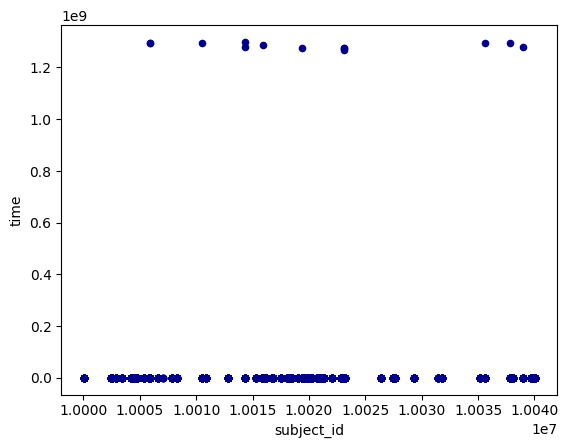

In [ ]:
ax1 = emar_df[emar_df["time"] > -5].plot.scatter(x='subject_id', y='time', c='DarkBlue')
ax1

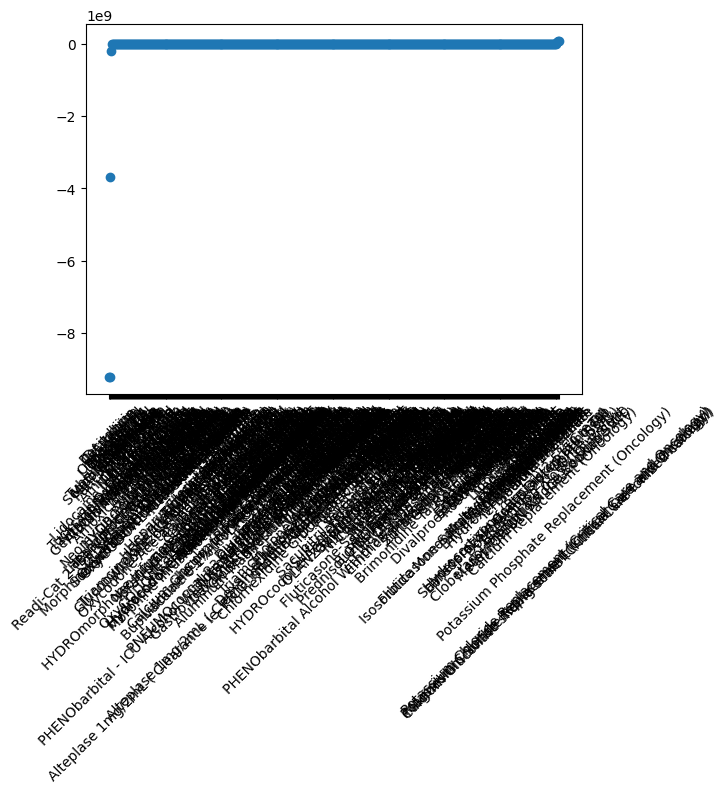

In [ ]:
temp = emar_df.groupby(["medication"])["time"].mean().sort_values()
plt.scatter(list(temp.keys()), temp)
plt.xticks(rotation=45)
plt.show()

In [ ]:
dia_df = normalize_jsons(df["diagnoses_icd"], ["subject_id", "hadm_id", "seq_num", "icd_code"], ["subject_id", "seq_num"])
dia_df

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22841357,1,07071,9
2,10000032,25742920,1,07054,9
3,10000032,29079034,1,45829,9
4,10000032,22595853,2,78959,9
...,...,...,...,...,...
4501,10040025,27996267,35,R197,10
4502,10040025,27996267,36,R748,10
4503,10040025,27996267,37,K5903,10
4504,10040025,27996267,38,T402X5A,10


In [ ]:
transfer_df = normalize_jsons(df["transfers"], ["subject_id", "hadm_id", "transfer_id"], ["subject_id", "intime"])
transfer_df

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,10000032,22595853.0,33258284,ED,Emergency Department,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22595853.0,35223874,admit,Transplant,2180-05-06 23:30:00,2180-05-07 17:21:27
2,10000032,22595853.0,36904543,discharge,None,2180-05-07 17:21:27,None
3,10000032,22841357.0,38112554,ED,Emergency Department,2180-06-26 15:54:00,2180-06-26 21:31:00
4,10000032,22841357.0,34703856,admit,Transplant,2180-06-26 21:31:00,2180-06-27 18:49:12
...,...,...,...,...,...,...,...
1131,10040025,27996267.0,35449441,admit,PACU,2148-01-23 12:18:49,2148-01-23 14:23:57
1132,10040025,27996267.0,36822441,transfer,Vascular,2148-01-23 14:23:57,2148-01-24 04:50:17
1133,10040025,27996267.0,36107367,transfer,Surgical Intensive Care Unit (SICU),2148-01-24 04:50:17,2148-01-30 17:45:09
1134,10040025,27996267.0,36762745,transfer,Vascular,2148-01-30 17:45:09,2148-02-04 20:51:55


In [ ]:
prescriptions_df = normalize_jsons(df["prescriptions"], ["subject_id", "hadm_id", "pharmacy_id", "starttime", "drug"], ["subject_id", "starttime", "drug"])
prescriptions_df

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10000032,22595853,28781051,10000032-27,27.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Heparin,...,006549,63323026201.0,5000 Units / mL- 1mL Vial,None,5000,UNIT,1,mL,3.0,SC
1,10000032,22595853,92009906,10000032-18,18.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Influenza Vaccine Quadrivalent,...,072514,19515089452.0,0.5 mL Syringe,None,0.5,mL,1,SYR,0.0,IM
2,10000032,22595853,14779570,10000032-22,22.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Sodium Chloride 0.9% Flush,...,None,0.0,10 mL Syringe,None,3,mL,0.3,SYR,3.0,IV
3,10000032,22595853,11700683,10000032-34,34.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Acetaminophen,...,004490,904198861.0,500mg Tablet,None,500,mg,1,TAB,,PO/NG
4,10000032,22595853,42497745,10000032-28,28.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Albuterol Inhaler,...,028090,173068224.0,8 g Inhaler,None,2,PUFF,0.02,INH,,IH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18082,10040025,27996267,75210074,10040025-1983,1983.0,P43SCN,2148-02-03 03:00:00,2148-02-05 01:00:00,MAIN,OxyCODONE (Immediate Release),...,004225,904644461.0,5mg Tablet,None,5-15,mg,1-3,TAB,,PO/NG
18083,10040025,27996267,79036609,10040025-1995,1995.0,P36DBH,2148-02-04 10:00:00,2148-02-05 01:00:00,MAIN,Insulin,...,001723,2821501.0,100 Units / mL - 10 mL Vial,None,0,UNIT,10,VIAL,,SC
18084,10040025,27996267,68377712,10040025-1999,1999.0,P36DBH,2148-02-04 13:00:00,2148-02-05 01:00:00,BASE,Dextrose 5%,...,001972,338001704.0,Dextrose 5%,None,1000,mL,1000,mL,,IV
18085,10040025,27996267,89728554,10040025-2004,2004.0,P36FR0,2148-02-04 18:00:00,2148-02-05 01:00:00,MAIN,Morphine Sulfate,...,074851,641612525.0,4 mg / 1 mL Vial,None,4,mg,1,VIAL,1.0,IV


In [ ]:
services_df = normalize_jsons(df["services"], ["subject_id", "hadm_id", "transfertime", "curr_service"], ["subject_id", "transfertime", "curr_service"])
services_df

,subject_id,hadm_id,transfertime,prev_service,curr_service
0,10000032,22595853,2180-05-06 22:24:57,None,MED
1,10000032,22841357,2180-06-26 18:28:08,None,MED
2,10000032,29079034,2180-07-23 12:36:04,None,MED
3,10000032,25742920,2180-08-05 23:44:50,None,MED
4,10001217,24597018,2157-11-18 22:57:43,None,NMED
...,...,...,...,...,...
314,10040025,22251969,2147-08-03 03:01:07,None,MED
315,10040025,27876215,2147-11-09 08:02:52,None,MED
316,10040025,27259207,2147-12-04 20:49:51,None,VSURG
317,10040025,25933959,2147-12-29 19:37:01,None,VSURG


In [ ]:
poe_df = normalize_jsons(df["poe"], ["subject_id", "poe_id", "poe_seq", "ordertime"], ["subject_id", "ordertime", "order_type"])
poe_df

,poe_id,poe_seq,subject_id,hadm_id,ordertime,order_type,order_subtype,transaction_type,discontinue_of_poe_id,discontinued_by_poe_id,order_provider_id,order_status
0,10000032-7,7,10000032,22595853,2180-05-06 20:16:56,Lab,None,New,None,None,P9705S,Inactive
1,10000032-8,8,10000032,22595853,2180-05-06 20:37:14,Medications,None,New,None,10000032-9,P9705S,Inactive
2,10000032-9,9,10000032,22595853,2180-05-06 20:37:31,Medications,None,D/C,10000032-8,None,P9705S,Inactive
3,10000032-10,10,10000032,22595853,2180-05-06 20:50:49,Lab,None,New,None,None,P9705S,Inactive
4,10000032-12,12,10000032,22595853,2180-05-06 20:51:19,Lab,None,New,None,None,P9705S,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...
45149,10040025-2004,2004,10040025,27996267,2148-02-04 17:05:43,Medications,None,New,None,None,P36FR0,Inactive
45150,10040025-2005,2005,10040025,27996267,2148-02-04 18:19:31,ADT orders,Discharge,New,None,10040025-2008,P36FR0,Inactive
45151,10040025-2006,2006,10040025,27996267,2148-02-04 18:38:18,ADT orders,Discharge,New,None,None,P36FR0,Inactive
45152,10040025-2008,2008,10040025,27996267,2148-02-04 19:56:26,ADT orders,Discharge,D/C,10040025-2005,None,P36FR0,Inactive


In [ ]:
drg_df = normalize_jsons(df["drgcodes"], ["subject_id", "hadm_id", "description", "drg_code"], ["subject_id", "hadm_id", "drg_code"]).replace("", 0)
drg_df

,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10000032,22595853,APR,283,OTHER DISORDERS OF THE LIVER,2.0,2.0
1,10000032,22595853,HCFA,442,"DISORDERS OF LIVER EXCEPT MALIG,CIRR,ALC HEPA ...",0.0,0.0
2,10000032,22841357,APR,279,HEPATIC COMA & OTHER MAJOR ACUTE LIVER DISORDERS,3.0,2.0
3,10000032,22841357,HCFA,442,"DISORDERS OF LIVER EXCEPT MALIG,CIRR,ALC HEPA ...",0.0,0.0
4,10000032,25742920,APR,283,OTHER DISORDERS OF THE LIVER,3.0,2.0
...,...,...,...,...,...,...,...
449,10040025,27553957,HCFA,308,CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W MCC,0.0,0.0
450,10040025,27876215,APR,244,DIVERTICULITIS & DIVERTICULOSIS,3.0,3.0
451,10040025,27876215,HCFA,377,G.I. HEMORRHAGE W MCC,0.0,0.0
452,10040025,27996267,APR,711,"POST-OP, POST-TRAUMA, OTHER DEVICE INFECTIONS ...",3.0,3.0


In [ ]:
pharma_df = normalize_jsons(df["pharmacy"], ["subject_id", "hadm_id", "pharmacy_id", "starttime", "medication"], ["subject_id", "hadm_id", "starttime"])
pharma_df

,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,10000032,22595853,14779570,10000032-22,2180-05-07 00:00:00,2180-05-07 22:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,,,3.0,,Ongoing,36.0,Hours,,Floor Stock Item,
1,10000032,22595853,28781051,10000032-27,2180-05-07 00:00:00,2180-05-07 22:00:00,Heparin,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,,,3.0,,Ongoing,36.0,Hours,,Omnicell,
2,10000032,22595853,92009906,10000032-18,2180-05-07 00:00:00,2180-05-07 22:00:00,Influenza Vaccine Quadrivalent,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,,,0.0,,Ongoing,36.0,Hours,,Omnicell,
3,10000032,22595853,20256254,10000032-32,2180-05-07 01:00:00,2180-05-07 22:00:00,Raltegravir,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,,,2.0,,Ongoing,36.0,Hours,,Omnicell,
4,10000032,22595853,48770010,10000032-36,2180-05-07 01:00:00,2180-05-07 01:00:00,Potassium Chloride,Unit Dose,Discontinued,2180-05-07 00:09:24,...,,,1.0,1.0,Doses,36.0,Hours,,Omnicell,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15301,10040025,27996267,75210074,10040025-1983,2148-02-03 03:00:00,2148-02-05 01:00:00,OxyCODONE (Immediate Release),Unit Dose,Discontinued via patient discharge,2148-02-03 02:13:30,...,,,,,Ongoing,365.0,Days,,Omnicell,
15302,10040025,27996267,79036609,10040025-1995,2148-02-04 10:00:00,2148-02-05 01:00:00,Insulin,Unit Dose,Discontinued via patient discharge,2148-02-04 09:52:22,...,,,,,Ongoing,365.0,Days,,Omnicell,
15303,10040025,27996267,68377712,10040025-1999,2148-02-04 13:00:00,2148-02-05 01:00:00,None,IV Large Volume,Discontinued via patient discharge,2148-02-04 12:43:08,...,,,,10.0,Hours,36.0,Hours,,Distribution-Floor Stock,
15304,10040025,27996267,89728554,10040025-2004,2148-02-04 18:00:00,2148-02-05 01:00:00,Morphine Sulfate,Unit Dose,Discontinued via patient discharge,2148-02-04 17:10:20,...,0.0,,1.0,1.0,Doses,365.0,Days,,Omnicell,


In [ ]:
procedures_df = normalize_jsons(df["icustays"], ["subject_id", "hadm_id", "stay_id", "intime"], ["subject_id", "hadm_id", "intime"])
procedures_df

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,chartevents,datetimeevents,inputevents,outputevents,procedureevents,ingredientevents
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,"[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034,...","[{'subject_id': 10000032, 'hadm_id': 29079034,..."
1,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,"[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,...","[{'subject_id': 10001217, 'hadm_id': 24597018,..."
2,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,"[{'subject_id': 10001217, 'hadm_id': 27703517,...","[{'subject_id': 10001217, 'hadm_id': 27703517,...","[{'subject_id': 10001217, 'hadm_id': 27703517,...","[{'subject_id': 10001217, 'hadm_id': 27703517,...","[{'subject_id': 10001217, 'hadm_id': 27703517,...","[{'subject_id': 10001217, 'hadm_id': 27703517,..."
3,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,"[{'subject_id': 10001725, 'hadm_id': 25563031,...","[{'subject_id': 10001725, 'hadm_id': 25563031,...","[{'subject_id': 10001725, 'hadm_id': 25563031,...","[{'subject_id': 10001725, 'hadm_id': 25563031,...","[{'subject_id': 10001725, 'hadm_id': 25563031,...","[{'subject_id': 10001725, 'hadm_id': 25563031,..."
4,10002428,20321825,34807493,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2156-04-30 21:53:00,2156-05-02 22:27:20,2.023843,"[{'subject_id': 10002428, 'hadm_id': 20321825,...","[{'subject_id': 10002428, 'hadm_id': 20321825,...","[{'subject_id': 10002428, 'hadm_id': 20321825,...","[{'subject_id': 10002428, 'hadm_id': 20321825,...","[{'subject_id': 10002428, 'hadm_id': 20321825,...","[{'subject_id': 10002428, 'hadm_id': 20321825,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,10039708,24928679,37323533,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2143-09-19 19:40:55,2143-09-20 16:29:51,0.867315,"[{'subject_id': 10039708, 'hadm_id': 24928679,...","[{'subject_id': 10039708, 'hadm_id': 24928679,...","[{'subject_id': 10039708, 'hadm_id': 24928679,...",[],"[{'subject_id': 10039708, 'hadm_id': 24928679,...","[{'subject_id': 10039708, 'hadm_id': 24928679,..."
136,10039708,28258130,33281088,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2140-01-23 18:08:00,2140-02-08 22:28:20,16.180787,"[{'subject_id': 10039708, 'hadm_id': 28258130,...","[{'subject_id': 10039708, 'hadm_id': 28258130,...","[{'subject_id': 10039708, 'hadm_id': 28258130,...","[{'subject_id': 10039708, 'hadm_id': 28258130,...","[{'subject_id': 10039708, 'hadm_id': 28258130,...","[{'subject_id': 10039708, 'hadm_id': 28258130,..."
137,10039831,26924951,39142259,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2115-12-28 19:36:43,2115-12-30 16:31:48,1.871586,"[{'subject_id': 10039831, 'hadm_id': 26924951,...","[{'subject_id': 10039831, 'hadm_id': 26924951,...","[{'subject_id': 10039831, 'hadm_id': 26924951,...","[{'subject_id': 10039831, 'hadm_id': 26924951,...","[{'subject_id': 10039831, 'hadm_id': 26924951,...","[{'subject_id': 10039831, 'hadm_id': 26924951,..."
138,10039997,24294180,36893762,Surgical Intensive Care Unit (SICU),Surgical I

In [ ]:
df = df[["subject_id", "hadm_id", "admittime", "dischtime", "deathtime", "admission_type", "admit_provider_id", "admission_location", "discharge_location", "insurance", "language", "marital_status", "race", "edregtime", "edouttime", "hospital_expire_flag"]]
df = pd.merge(df, omr_df, on=['subject_id'], how='left').drop_duplicates()
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,chartdate,seq_num,result_name,result_value
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180-05-07,1,BMI (kg/m2),18.0
1,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180-05-25,1,BMI (kg/m2),18.6
2,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180-06-01,1,BMI (kg/m2),18.7
3,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180-06-22,1,BMI (kg/m2),18.9
4,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180-06-27,1,BMI (kg/m2),19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20734,10040025,27125816,2143-03-18 12:34:00,2143-03-19 12:00:00,NaN,AMBULATORY OBSERVATION,P623U2,PROCEDURE SITE,None,Other,ENGLISH,DIVORCED,WHITE,None,None,0,2147-08-03,1,Weight (Lbs),205.03
20735,10040025,27125816,2143-03-18 12:34:00,2143-03-19 12:00:00,NaN,AMBULATORY OBSERVATION,P623U2,PROCEDURE SITE,None,Other,ENGLISH,DIVORCED,WHITE,None,None,0,2147-11-09,1,Weight (Lbs),188.00
20736,10040025,27125816,2143-03-18 12:34:00,2143-03-19 12:00:00,NaN,AMBULATORY OBSERVATION,P623U2,PROCEDURE SITE,None,Other,ENGLISH,DIVORCED,WHITE,None,None,0,2147-12-05,1,Weight (Lbs),200.00
20737,10040025,27125816,2143-03-18 12:34:00,2143-03-19 12:00:00,NaN,AMBULATORY OBSERVATION,P623U2,PROCEDURE SITE,None,Other,ENGLISH,DIVORCED,WHITE,None,None,0,2147-12-29,1,Weight (Lbs),212


<AxesSubplot:>

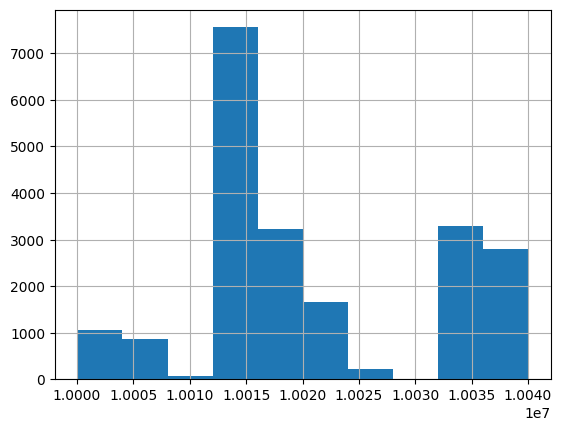

In [ ]:
df["subject_id"].hist()

In [ ]:
print(df_clean['Weight (Lbs)'].corr(df_clean['BMI (kg/m2)']))
print(df_clean['Height (Inches)'].corr(df_clean['BMI (kg/m2)']))
print(df_clean['Height (Inches)'].corr(df_clean['Weight (Lbs)']))

,subject_id,deathtime,insurance,language,marital_status,race,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,NaN,Other,ENGLISH,WIDOWED,WHITE,F,52,2180,2014 - 2016,2180-09-09
1,10001217,NaN,Other,?,MARRIED,WHITE,F,55,2157,2011 - 2013,
2,10001725,NaN,Other,ENGLISH,MARRIED,WHITE,F,46,2110,2011 - 2013,
3,10002428,NaN,Medicare,ENGLISH,WIDOWED,WHITE,F,80,2155,2011 - 2013,
4,10002495,NaN,Medicare,ENGLISH,MARRIED,UNKNOWN,M,81,2141,2014 - 2016,
...,...,...,...,...,...,...,...,...,...,...,...
95,10038999,NaN,Medicare,ENGLISH,SINGLE,WHITE,M,45,2131,2014 - 2016,
96,10039708,NaN,Other,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,F,46,2138,2014 - 2016,
97,10039831,NaN,Other,ENGLISH,MARRIED,UNABLE TO OBTAIN,F,57,2115,2011 - 2013,
98,10039997,NaN,Medicare,ENGLISH,WIDOWED,BLACK/AFRICAN AMERICAN,F,67,2134,2014 - 2016,


In [ ]:
subject_df = df.drop_duplicates(subset=["subject_id"])[["subject_id", "deathtime", "insurance", "language", "marital_status", "race"]]
patient_df = pd.merge(subject_df, patients_df, on='subject_id', how='inner')
patient_df

In [ ]:
temp = patient_df.groupby(["race", "gender", "insurance"]).size().reset_index(name='count').sort_values(by=["count"], ascending=False)
temp['sum_counts'] = temp.groupby(["race", "gender"])['count'].transform('sum')
temp['ratio'] = temp['count'] / temp['sum_counts'] * 100
temp.sort_values(by=["race", "gender"])

,race,gender,insurance,count,sum_counts,ratio
1,BLACK/AFRICAN AMERICAN,F,Medicare,5,8,62.500000
2,BLACK/AFRICAN AMERICAN,F,Other,2,8,25.000000
0,BLACK/AFRICAN AMERICAN,F,Medicaid,1,8,12.500000
3,BLACK/AFRICAN AMERICAN,M,Medicare,1,1,100.000000
4,BLACK/CAPE VERDEAN,M,Medicaid,1,1,100.000000
5,HISPANIC OR LATINO,M,Other,1,1,100.000000
6,HISPANIC/LATINO - CUBAN,F,Medicare,1,1,100.000000
7,HISPANIC/LATINO - PUERTO RICAN,M,Medicaid,1,1,100.000000
9,HISPANIC/LATINO - SALVADORAN,F,Other,1,2,50.000000
8,HISPANIC/LATINO - SALVADORAN,F,Medicaid,1,2,50.000000
